# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q="



In [5]:
city_name = []
max_temps = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []


print("Beginning Data Retrieval")
print("----------------------------")
x=0
for city in cities: 
    try: 
        city_data = requests.get(query_url + city).json()
        x=x+1
        print(f"Processing Record {x} | {city}")
        city_name.append(city_data["name"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        max_temps.append(city_data["main"]["temp_max"])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
        wind_speed.append(city_data["wind"]["speed"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        #print(city_name)
    except KeyError: 
        print("city name not found")
        
        #print(city_name)
print("------------------------------")        
print("Data retrieval complete")
        

Beginning Data Retrieval
----------------------------
Processing Record 1 | airai
Processing Record 2 | cape town
Processing Record 3 | vaini
Processing Record 4 | georgetown
Processing Record 5 | krasnokamensk
Processing Record 6 | somerset
Processing Record 7 | kavieng
Processing Record 8 | jamestown
Processing Record 9 | norman wells
Processing Record 10 | mataura
Processing Record 11 | tonatico
Processing Record 12 | kapaa
Processing Record 13 | hermanus
Processing Record 14 | clinton
Processing Record 15 | grand river south east
city name not found
Processing Record 16 | taolanaro
city name not found
Processing Record 17 | punta arenas
Processing Record 18 | mecca
Processing Record 19 | vila velha
Processing Record 20 | saskylakh
Processing Record 21 | torbay
Processing Record 22 | brae
Processing Record 23 | derzhavinsk
Processing Record 24 | puerto ayora
Processing Record 25 | hobart
Processing Record 26 | samarai
Processing Record 27 | arraial do cabo
Processing Record 28 | kod

Processing Record 237 | alofi
Processing Record 238 | hasaki
Processing Record 239 | chokurdakh
Processing Record 240 | naze
Processing Record 241 | batangafo
Processing Record 242 | dingle
Processing Record 243 | saldanha
Processing Record 244 | sayalgudi
city name not found
Processing Record 245 | bengkulu
Processing Record 246 | broome
Processing Record 247 | altamira
Processing Record 248 | asau
Processing Record 249 | pervomayskiy
Processing Record 250 | raga
Processing Record 251 | chulman
Processing Record 252 | muros
Processing Record 253 | slave lake
Processing Record 254 | phan rang
city name not found
Processing Record 255 | sosua
Processing Record 256 | gat
Processing Record 257 | belushya guba
city name not found
Processing Record 258 | erdenet
Processing Record 259 | bubaque
Processing Record 260 | mehamn
Processing Record 261 | nybro
Processing Record 262 | champerico
Processing Record 263 | laguna
Processing Record 264 | chernyshevskiy
Processing Record 265 | lebu
Proce

Processing Record 473 | anito
Processing Record 474 | kismayo
Processing Record 475 | anadyr
Processing Record 476 | haines junction
Processing Record 477 | kharp
Processing Record 478 | east london
Processing Record 479 | poltavka
Processing Record 480 | qui nhon
Processing Record 481 | al
city name not found
Processing Record 482 | divnogorsk
Processing Record 483 | turkan
Processing Record 484 | gladstone
Processing Record 485 | oktyabrskiy
Processing Record 486 | caravelas
Processing Record 487 | dujuma
city name not found
Processing Record 488 | bathsheba
Processing Record 489 | port lincoln
Processing Record 490 | praxedis guerrero
Processing Record 491 | goderich
Processing Record 492 | provideniya
Processing Record 493 | toppenish
Processing Record 494 | enshi
Processing Record 495 | den helder
Processing Record 496 | upington
Processing Record 497 | thomaston
Processing Record 498 | asayita
city name not found
Processing Record 499 | karratha
Processing Record 500 | kalemie
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#make a dataframe
##add lat_lngs
city_data_df = pd.DataFrame({"City Name": city_name, 
                             "Lat": lat,
                             "Lng": lng,
                              "Max Temp": max_temps, 
                              "Humidity": humidity, 
                              "Cloudiness": cloudiness,
                              "Wind Speed": wind_speed,
                              "Country": country,
                              "Date": date})
city_data_df.head(10)

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.93,125.41,60.84,100,16,0.89,TL,1603827026
1,Cape Town,-33.93,18.42,66.00,82,20,4.70,ZA,1603826904
2,Vaini,-21.20,-175.20,69.80,94,75,5.82,TO,1603826444
3,George Town,5.41,100.34,78.80,88,20,5.77,MY,1603826490
4,Krasnokamensk,50.10,118.04,23.16,85,0,8.72,RU,1603827026
5,Somerset,40.57,-74.55,62.01,51,1,4.70,US,1603827026
6,Kavieng,-2.57,150.80,81.84,69,100,2.33,PG,1603826429
7,Jamestown,42.10,-79.24,46.99,75,90,5.82,US,1603826443
8,Norman Wells,65.28,-126.83,19.40,85,75,9.17,CA,1603826575
9,Mataura,-46.19,168.86,46.00,90,11,1.01,NZ,1603827027


In [7]:
#export to .csv
city_data_df.to_csv("city_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#get summary statistics to inspect the data
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,20.010500,19.068589,59.103643,72.182143,49.925000,7.720911,1.603827e+09
std,33.293276,90.751320,22.859957,22.441234,41.316589,5.589372,2.385059e+02
min,-54.800000,-179.170000,-11.540000,7.000000,0.000000,0.310000,1.603826e+09
25%,-5.740000,-62.295000,44.595000,63.000000,1.000000,3.360000,1.603827e+09
50%,22.740000,24.700000,65.435000,78.000000,48.500000,6.850000,1.603827e+09
75%,48.002500,96.220000,77.847500,88.000000,90.000000,10.290000,1.603827e+09
max,78.220000,179.320000,96.170000,100.000000,100.000000,35.860000,1.603827e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_onehundred = city_data_df.loc[city_data_df["Humidity"]>100]
humid_cities_onehundred = humidity_over_onehundred["City Name"].count()
humid_cities_onehundred

0

In [15]:
#convert the timestamp to a date
timestamp = time.localtime(city_data_df["Date"][0])
date = f'{time.tm_mon}-{time.tm_mday}-{time.tm_year}'
date = f'{time.tm_year}-{time.tm_mon}-{time.tm_mday}'
print(date)


AttributeError: module 'time' has no attribute 'tm_year'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

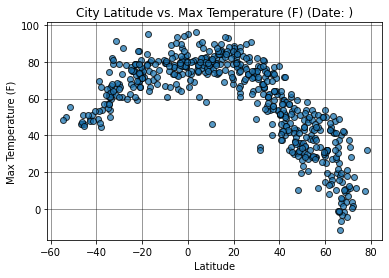

In [19]:
#create scatter plot with Latitude and Max Temp
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black", alpha=0.75)

#add title and labels
plt.title(f"City Latitude vs. Max Temperature (F) (Date: )")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#add grid
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)

#save figure as png and display 
plt.savefig("Images/latitudeVStemp.png")
plt.show()

### 1. Scatter plot observation: City Latitude vs. Max Temperature (F)

The scatter plot above shows the relationship between latitude and the maximum temperature (F) of a city. Cities closer to the equator and in the southern hemisphere have a higher maximum temperature than those further north. 

## Latitude vs. Humidity Plot

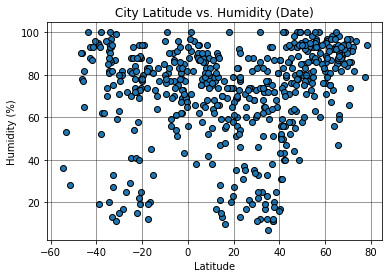

In [20]:
#create scatter plot with Latitude and Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

#add title and labels
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#add grid
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)

#save figure as png and display 
plt.savefig("Images/latitudeVShumidity.png")
plt.show()

### 2. Scatter plot observation: City Latitude vs. Humidity

The scatter plot above shows that there's a weak relationship between a city's latitude and humidity. 

## Latitude vs. Cloudiness Plot

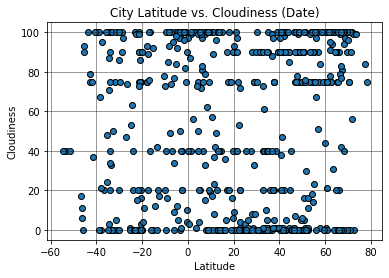

In [22]:
#create scatter plot with Latitude and Cloudiness 
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

#add title and labels
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#add grid
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)

#save figure as png and display 
plt.savefig("Images/latitudeVScloudiness.png")
plt.show()

### 3. Scatter plot observation: City Latitude vs. Cloudiness

The scatter plot above shows that there is no realtionship between a city's latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

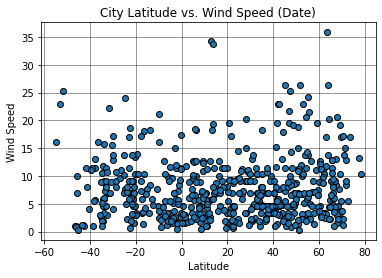

In [23]:
#create scatter plot with Latitude and Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

#add title and labels
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#add grid
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)

#save figure as png and display 
plt.savefig("Images/latitudeVSwindspeed.png")
plt.show()

### 4. Scatter plot observation: City Latitude vs. Wind Speed
The scatter plot above shows there is no relationship between wind speed and a city's latitude. A few outliers can be seen with high wind speeds, but as this data is a snapshot of weather events on a single date, this is not a reliable indication of a strong relationship between these variables. 

## Linear Regression

In [25]:
#make a df with the Northern Hemisphere cities
#city_data_df.loc[city_data_df["Humidity"]>80]

northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
northern_hemi_df.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,George Town,5.41,100.34,78.80,88,20,5.77,MY,1603826490
4,Krasnokamensk,50.10,118.04,23.16,85,0,8.72,RU,1603827026
5,Somerset,40.57,-74.55,62.01,51,1,4.70,US,1603827026
7,Jamestown,42.10,-79.24,46.99,75,90,5.82,US,1603826443
8,Norman Wells,65.28,-126.83,19.40,85,75,9.17,CA,1603826575


In [26]:
#make a df with the Southern Hemisphere cities
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_df.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.93,125.41,60.84,100,16,0.89,TL,1603827026
1,Cape Town,-33.93,18.42,66.00,82,20,4.70,ZA,1603826904
2,Vaini,-21.20,-175.20,69.80,94,75,5.82,TO,1603826444
6,Kavieng,-2.57,150.80,81.84,69,100,2.33,PG,1603826429
9,Mataura,-46.19,168.86,46.00,90,11,1.01,NZ,1603827027


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.75


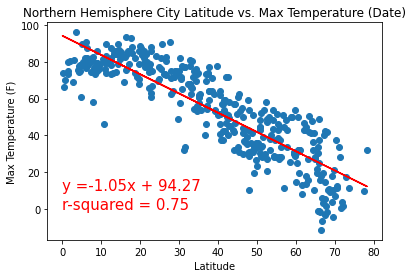

In [36]:
#Define x, y values
n_max_temp_x_values = northern_hemi_df["Lat"]
n_max_temp_y_values = northern_hemi_df["Max Temp"]

#find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(n_max_temp_slope, n_max_temp_intercept, n_max_temp_rvalue, n_max_temp_pvalue, n_max_temp_stderr) = linregress(n_max_temp_x_values, n_max_temp_y_values)
n_max_temp_regress_values = np.asarray(n_max_temp_x_values) * n_max_temp_slope + n_max_temp_intercept

#calculate r-squared
n_max_temp_rsquared = round(n_max_temp_rvalue**2,2)
print(f"The r-squared is: {n_max_temp_rsquared}")

#line equation y = mx + b
n_max_temp_line_eq = "y =" + str(round(n_max_temp_slope,2)) + "x + " + str(round(n_max_temp_intercept,2))

#create scatter plot
plt.scatter(n_max_temp_x_values, n_max_temp_y_values)

#add regression line
plt.plot(n_max_temp_x_values, n_max_temp_regress_values, "r-")

#add title and labels
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#add annotation to plot
plt.annotate(n_max_temp_line_eq,(0,10), fontsize=15, color="red")
plt.annotate(f"r-squared = {n_max_temp_rsquared}",(0,0),fontsize=15,color="red")

plt.savefig("Images/n_hemi_latitudeVStemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.56


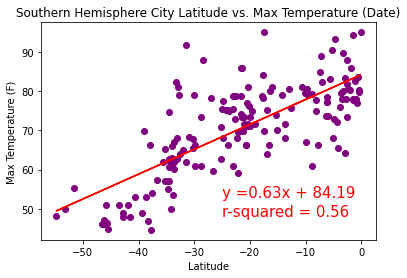

In [44]:
#Define x, y values
s_max_temp_x_values = southern_hemi_df["Lat"]
s_max_temp_y_values = southern_hemi_df["Max Temp"]

#find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(s_max_temp_slope, s_max_temp_intercept, s_max_temp_rvalue, s_max_temp_pvalue, s_max_temp_stderr) = linregress(s_max_temp_x_values, s_max_temp_y_values)
s_max_temp_regress_values = np.asarray(s_max_temp_x_values) * s_max_temp_slope + s_max_temp_intercept

#calculate r-squared
s_max_temp_rsquared = round(s_max_temp_rvalue**2,2)
print(f"The r-squared is: {s_max_temp_rsquared}")

#line equation y = mx + b
s_max_temp_line_eq = "y =" + str(round(s_max_temp_slope,2)) + "x + " + str(round(s_max_temp_intercept,2))

#create scatter plot
plt.scatter(s_max_temp_x_values, s_max_temp_y_values, color="purple")

#add regression line
plt.plot(s_max_temp_x_values, s_max_temp_regress_values, "r-")

#add title and labels
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#add annotation to plot
plt.annotate(s_max_temp_line_eq,(-25,53), fontsize=15, color="red")
plt.annotate(f"r-squared = {s_max_temp_rsquared}",(-25,48),fontsize=15,color="red")

plt.savefig("Images/s_hemi_latitudeVStemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09


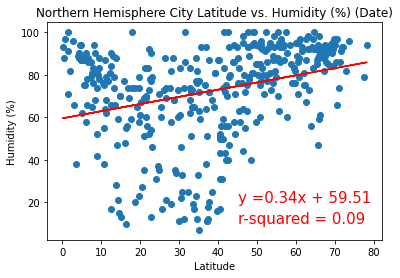

In [40]:
#Define x, y values
n_humidity_x_values = northern_hemi_df["Lat"]
n_humidity_y_values = northern_hemi_df["Humidity"]

#find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(n_humidity_slope, n_humidity_intercept, n_humidity_rvalue, n_humidity_pvalue, n_humidity_stderr) = linregress(n_humidity_x_values, n_humidity_y_values)
n_humidity_regress_values = np.asarray(n_humidity_x_values) * n_humidity_slope + n_humidity_intercept

#calculate r-squared
n_humidity_rsquared = round(n_humidity_rvalue**2,2)
print(f"The r-squared is: {n_humidity_rsquared}")

#line equation y = mx + b
n_humidity_line_eq = "y =" + str(round(n_humidity_slope,2)) + "x + " + str(round(n_humidity_intercept,2))

#create scatter plot
plt.scatter(n_humidity_x_values, n_humidity_y_values)

#add regression line
plt.plot(n_humidity_x_values, n_humidity_regress_values, "r-")

#add title and labels
plt.title("Northern Hemisphere City Latitude vs. Humidity (%) (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#add annotation to plot
plt.annotate(n_humidity_line_eq,(45,20), fontsize=15, color="red")
plt.annotate(f"r-squared = {n_humidity_rsquared}",(45,10),fontsize=15,color="red")

plt.savefig("Images/n_hemi_latitudeVShumidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0


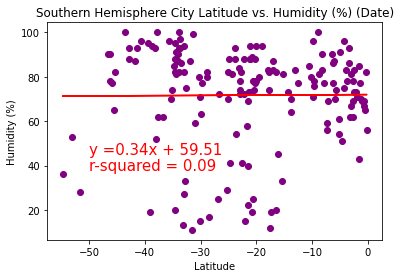

In [45]:
#Define x, y values
s_humidity_x_values = southern_hemi_df["Lat"]
s_humidity_y_values = southern_hemi_df["Humidity"]

#find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(s_humidity_slope, s_humidity_intercept, s_humidity_rvalue, s_humidity_pvalue, s_humidity_stderr) = linregress(s_humidity_x_values, s_humidity_y_values)
s_humidity_regress_values = np.asarray(s_humidity_x_values) * s_humidity_slope + s_humidity_intercept

#calculate r-squared
s_humidity_rsquared = round(s_humidity_rvalue**2,2)
print(f"The r-squared is: {s_humidity_rsquared}")

#line equation y = mx + b
s_humidity_line_eq = "y =" + str(round(s_humidity_slope,2)) + "x + " + str(round(s_humidity_intercept,2))

#create scatter plot
plt.scatter(s_humidity_x_values, s_humidity_y_values, color="purple")

#add regression line
plt.plot(s_humidity_x_values, s_humidity_regress_values, "r-")

#add title and labels
plt.title("Southern Hemisphere City Latitude vs. Humidity (%) (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#add annotation to plot
plt.annotate(n_humidity_line_eq,(-50,45), fontsize=15, color="red")
plt.annotate(f"r-squared = {n_humidity_rsquared}",(-50,38),fontsize=15,color="red")

plt.savefig("Images/s_hemi_latitudeVShumidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02


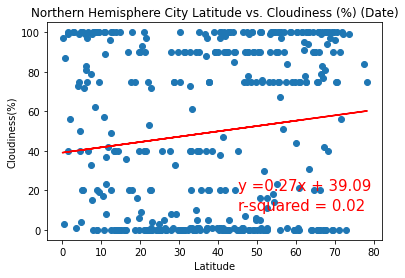

In [46]:
#Define x, y values
n_cloudiness_x_values = northern_hemi_df["Lat"]
n_cloudiness_y_values = northern_hemi_df["Cloudiness"]

#find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(n_cloudiness_slope, n_cloudiness_intercept, n_cloudiness_rvalue, n_cloudiness_pvalue, n_cloudiness_stderr) = linregress(n_cloudiness_x_values, n_cloudiness_y_values)
n_cloudiness_regress_values = np.asarray(n_cloudiness_x_values) * n_cloudiness_slope + n_cloudiness_intercept

#calculate r-squared
n_cloudiness_rsquared = round(n_cloudiness_rvalue**2,2)
print(f"The r-squared is: {n_cloudiness_rsquared}")

#line equation y = mx + b
n_cloudiness_line_eq = "y =" + str(round(n_cloudiness_slope,2)) + "x + " + str(round(n_cloudiness_intercept,2))

#create scatter plot
plt.scatter(n_cloudiness_x_values, n_cloudiness_y_values)

#add regression line
plt.plot(n_cloudiness_x_values, n_cloudiness_regress_values, "r-")

#add title and labels
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (%) (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

#add annotation to plot
plt.annotate(n_cloudiness_line_eq,(45,20), fontsize=15, color="red")
plt.annotate(f"r-squared = {n_cloudiness_rsquared}",(45,10),fontsize=15,color="red")

plt.savefig("Images/n_hemi_latitudeVScloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


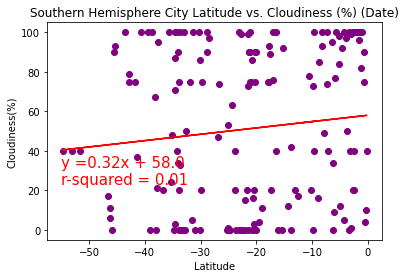

In [54]:
#Define x, y values
s_cloudiness_x_values = southern_hemi_df["Lat"]
s_cloudiness_y_values = southern_hemi_df["Cloudiness"]

#find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(s_cloudiness_slope, s_cloudiness_intercept, s_cloudiness_rvalue, s_cloudiness_pvalue, s_cloudiness_stderr) = linregress(s_cloudiness_x_values, s_cloudiness_y_values)
s_cloudiness_regress_values = np.asarray(s_cloudiness_x_values) * s_cloudiness_slope + s_cloudiness_intercept

#calculate r-squared
s_cloudiness_rsquared = round(s_cloudiness_rvalue**2,2)
print(f"The r-squared is: {s_cloudiness_rsquared}")

#line equation y = mx + b
s_cloudiness_line_eq = "y =" + str(round(s_cloudiness_slope,2)) + "x + " + str(round(s_cloudiness_intercept,2))

#create scatter plot
plt.scatter(s_cloudiness_x_values, s_cloudiness_y_values, color="purple")

#add regression line
plt.plot(s_cloudiness_x_values, s_cloudiness_regress_values, "r-")

#add title and labels
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (%) (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

#add annotation to plot
plt.annotate(s_cloudiness_line_eq,(-55,32), fontsize=15, color="red")
plt.annotate(f"r-squared = {s_cloudiness_rsquared}",(-55,23),fontsize=15,color="red")

plt.savefig("Images/s_hemi_latitudeVScloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01


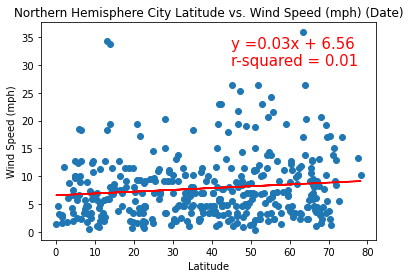

In [58]:
#Define x, y values
n_wind_x_values = northern_hemi_df["Lat"]
n_wind_y_values = northern_hemi_df["Wind Speed"]

#find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(n_wind_slope, n_wind_intercept, n_wind_rvalue, n_wind_pvalue, n_wind_stderr) = linregress(n_wind_x_values, n_wind_y_values)
n_wind_regress_values = np.asarray(n_wind_x_values) * n_wind_slope + n_wind_intercept

#calculate r-squared
n_wind_rsquared = round(n_wind_rvalue**2,2)
print(f"The r-squared is: {n_wind_rsquared}")

#line equation y = mx + b
n_wind_line_eq = "y =" + str(round(n_wind_slope,2)) + "x + " + str(round(n_wind_intercept,2))

#create scatter plot
plt.scatter(n_wind_x_values, n_wind_y_values)

#add regression line
plt.plot(n_wind_x_values, n_wind_regress_values, "r-")

#add title and labels
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (mph) (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#add annotation to plot
plt.annotate(n_wind_line_eq,(45,33), fontsize=15, color="red")
plt.annotate(f"r-squared = {n_wind_rsquared}",(45,30),fontsize=15,color="red")

plt.savefig("Images/n_hemi_latitudeVSwindspeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02


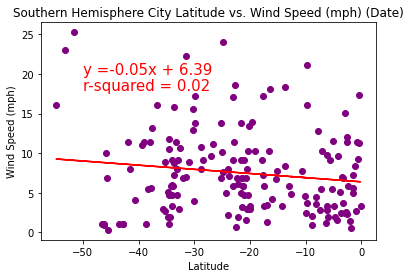

In [62]:
#Define x, y values
s_wind_x_values = southern_hemi_df["Lat"]
s_wind_y_values = southern_hemi_df["Wind Speed"]

#find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(s_wind_slope, s_wind_intercept, s_wind_rvalue, s_wind_pvalue, s_wind_stderr) = linregress(s_wind_x_values, s_wind_y_values)
s_wind_regress_values = np.asarray(s_wind_x_values) * s_wind_slope + s_wind_intercept

#calculate r-squared
s_wind_rsquared = round(s_wind_rvalue**2,2)
print(f"The r-squared is: {s_wind_rsquared}")

#line equation y = mx + b
s_wind_line_eq = "y =" + str(round(s_wind_slope,2)) + "x + " + str(round(s_wind_intercept,2))

#create scatter plot
plt.scatter(s_wind_x_values, s_wind_y_values, color="purple")

#add regression line
plt.plot(s_wind_x_values, s_wind_regress_values, "r-")

#add title and labels
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (mph) (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#add annotation to plot
plt.annotate(s_wind_line_eq,(-50,20), fontsize=15, color="red")
plt.annotate(f"r-squared = {s_wind_rsquared}",(-50,18),fontsize=15,color="red")

plt.savefig("Images/s_hemi_latitudeVSwindspeed.png")
plt.show()